# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [2]:
%%html
<style>
    table{float:left}
    .MathJax{float: left;}
</style>

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [23]:
# TODO: Minimum price of the data
# All of these can get the same result
#minimum_price = prices.describe().min()
#minimum_price = prices.values.min()
#minimum_price = np.min(prices)
minimum_price = np.min(prices.values)

# TODO: Maximum price of the data
#maximum_price = prices.describe().max()
maximum_price = np.max(prices.values)

# TODO: Mean price of the data
#mean_price = prices.describe().mean()
mean_price = np.mean(prices.values)

# TODO: Median price of the data
#median_price = prices.describe().median()
median_price = np.median(prices.values)

# TODO: Standard deviation of prices of the data
#std_price = prices.describe().std()
std_price = np.std(prices.values)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


In [4]:
prices.describe()

count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64

For std, refer to the difference between numpy and panda.
- https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance
- https://github.com/pandas-dev/pandas/issues/10242

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c02ab2d30>,
      dtype=object)

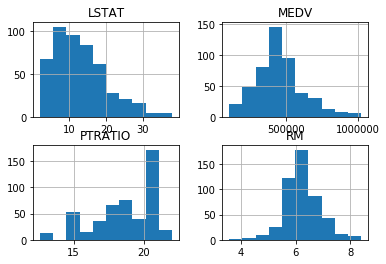

In [5]:
data.hist()

In [21]:
print(type(prices.values))

<class 'pandas.core.series.Series'>


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

If the value of *'MEDV'* increases(descreases),

* *'RM'* : increases (descreases)
* *'LSTAT'* : decreases (increases)
* *'PTRATIO'* : decrease (increases)

This can be said in other words,
*'RM'* has a positive correlation with *'MEDV'*
*'LSTAT'* and *'PTRATIO'* has a negative correlation with *'MEDV'*
and statistically we can say with the below correlation values.

In [5]:
data.sort_values('MEDV').corr()['MEDV']

RM         0.697209
LSTAT     -0.760670
PTRATIO   -0.519034
MEDV       1.000000
Name: MEDV, dtype: float64

This tendency can be viewed with a moving average graph as below.
As the value of *'MEDV'* increases, *'RM'* increases, and *'LSTAT'* and *'PTRATIO'* decreases.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4e467c518>,
      dtype=object)

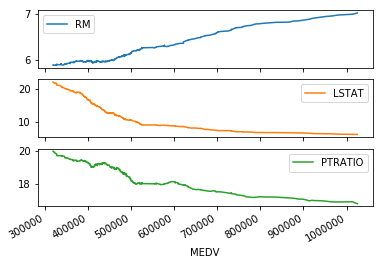

In [6]:
data.sort_values('MEDV').set_index('MEDV').rolling(window=100).mean().plot(subplots=True)

We should note that depending on the *'MEDV'* range this correlation changes.
Above $600,000, *'MEDV'* and *'PATRATIO'* is almost irrelevant, seeing from the correlation value..

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4b4a6dd68>,
      dtype=object)

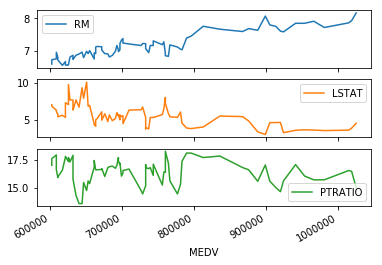

In [7]:
data[data['MEDV'] > 600000].sort_values('MEDV').set_index('MEDV').rolling(window=3).mean().plot(subplots=True)

In [8]:
data[data['MEDV'] > 600000].sort_values('MEDV').corr()['MEDV']

RM         0.771899
LSTAT     -0.372539
PTRATIO   -0.130185
MEDV       1.000000
Name: MEDV, dtype: float64

Below $300,000, *'RM'* and *'PATRATIO'* is almost irrelevant with *'MEDV'*, seeing from the correlation value.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4b4936e10>,
      dtype=object)

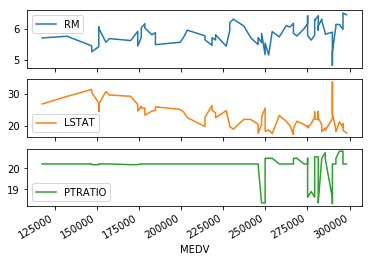

In [9]:
data[data['MEDV'] < 300000].sort_values('MEDV').set_index('MEDV').rolling(window=3).mean().plot(subplots=True)

In [10]:
data[data['MEDV'] < 300000].sort_values('MEDV').corr()['MEDV']

RM         0.172725
LSTAT     -0.407910
PTRATIO   -0.098424
MEDV       1.000000
Name: MEDV, dtype: float64

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

R-squared, coefficient of determination
$$ 
1 - \frac{\sum_{n-1}^{i=0} (y_i - \hat{y})^2}{\sum_{n-1}^{i=0} (y_i -\overline{y})^2}
$$ 

$$ 
y : Actual Value
\hat{y} : Predicted Value
\overline{y} : Average Value
n : the number of samples
$$ 

In [11]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
# option
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict, ):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    print("-performance_metric-------------------------------------")
    print("R-squared, coefficient of determination : {:.3f}".format(score))
    print("MAE : {:.3f}".format(mean_absolute_error(y_true, y_predict)))
    print("MSE : {:.3f}".format(mean_squared_error(y_true, y_predict)))
    print("RMSE : {:.3f}".format(np.sqrt(mean_squared_error(y_true, y_predict))))
    print("--------------------------------------------------------")
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [12]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.923
MAE : 0.600
MSE : 0.472
RMSE : 0.687
--------------------------------------------------------
Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

| Quession | Answer |
|:--|:--|
|Would you consider this model to have successfully captured the variation of the target variable? | Yes |
|Why or why not? |In the model performance validation above, the model has a coefficient of determination, R^2, of 0.923, which is close to 1. This can be "R2 score of 1 means the dependent variable can be predicted from the independent variable.".|

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.model_selection` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [13]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
#X_train, X_test, y_train, y_test = train_test_split(data, prices, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 0)

# Success
print("Training and testing split was successful.")
print("Test Size: {:.3f}".format(len(y_test)/(len(y_train)+len(y_test))))

Training and testing split was successful.
Test Size: 0.200


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

To avoid the classifier to classify data based on the same dataset, which results in meaninglessly high fit score.
This meaninglesly high fit score results in overfitting to the test data set, as it biases to fit to the training set.
So it is good to separate the training set and test set in statistical approach to model dataset.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

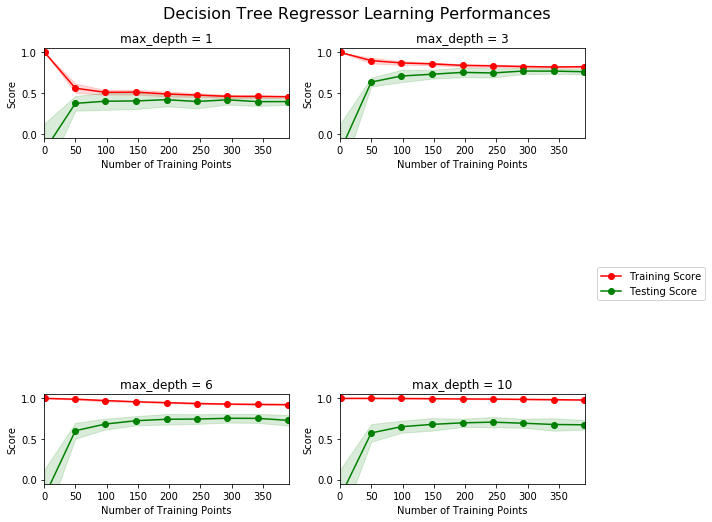

In [14]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

Choose one of the graphs above and state the maximum depth for the model. 
==> Picked up all for my understandings.

**max_depth = 3** will be the best as:
- Converges faster with smaller trainint points.
- Mark good score

In a decision tree model, the max depth and the training points seems to be controlling the model quality.

| Max Depth | Traning Curves Impanct<br>on more training points | Testing Curves Impact<br>on more training points | More Traning points beneficial? |
|:----------|:---------------------|:--------------------|:---------------------|
| 1 | Small<br>Converged around 200<br>Deviation small around 300 and converged| Small<br>Converged around 200<br>Deviation small around 300 | No<br>Converged fast around 200-300 points.<br>We cannot expect that to improve from the bad score. |
| 3 | Small<br>Deviation already small and converged | Small<br>Deviation already small and converged | No<br>Good score around 300<br>Will not improve that much. |
| 6 | Small<br>Deviation already small and converged | Negative<br>Deviation indicates it is not converged yet<br>Decreasing the score after 250. | No<br>Testing score could increase,<br>while training score ramins almost the same.<br>Some risk on overfitting to traing set. |
| 10 | Small<br>Deviation already small and converged | Negative<br>Deviation value is increasing after 200.<br>Will not lead to good results.  | No<br>Suspect on overfitting to the training set. |

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

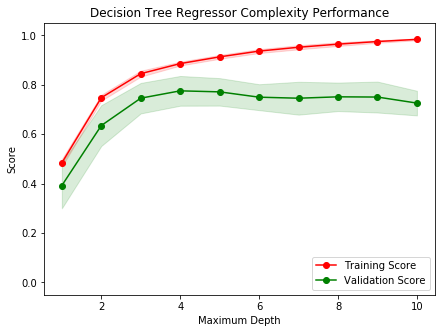

In [15]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **


The graph is different in values from the leaning perofmance.
But anyway from graphs...

* *When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?*<br>The model suffer from high bias.
* *How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*<br>The high variance is high, and the model overfitted to the training data.



### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

The **maximum depth = 4**, I think, is the the model that best generalizes to unseen data.
Valudation score reaches to 1.0 at that depth. And So we can expect good result with less calculation effort.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **


* **What is the grid search technique?**
    - **Grid Seach technique** is one of the model parameter tuning approch by exhaustively considers all parameter combinations.
    - The tuning result is evaluated based on the accuracy score, such as R-Squared, F1 etc.
* **How it can be applied to optimize a learning algorithm?**
    - With the grid search technique we can optimize the tuning result which maximizes the performance score effectively.
    - With the grid search technique, several scoring algorithms and several hyperparameters are available.
    - The example in this case is, max_depth, min_samples_leaf and min_samples_split<br>
    - Manually selecting parapeter that has larger impact on the model performance requires requires try and errort effort for each combination of hyperparamters.

*c.f.*

* 3.2.Parameter estimation using grid search with cross-validation
    http://scikit-learn.org/stable/modules/grid_search.html
* 3.3.1. The scoring parameter: defining model evaluation rules
    https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

- **What is the k-fold cross-validation training technique?**<br>
  - K-fold is one of the approadh to be used to generate dataset splits for the cross validation strategies.
  - K-Fold divides all the samples in groups of samples, called folds of equal sizes (if possible).
  - In the **the k-fold cross-validation training technique**, the prediction function uses (k-1) for trainings(lernings) and test with the remaining 1.
  - This is repeated for every folds to be tested once, that means repeating k-times.
  - The score is averaged to get a single score.

- **What benefit does this technique provide for grid search when optimizing a model?**
  - The benefit of **the k-fold cross-validation training technique** is that all the samples in the dataset are used for both training and testing.
  - As the result the true error could be estimated as the average error rate. 

c.f.
3.1.2.1. Cross-validation iterators for i.i.d. data¶
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators-for-i-i-d-data
(Independent and Identically Distributed (i.i.d.))

Following is the example of k-fold split. Chose 2 in this case to be an equal size.

In [32]:
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
for i in range(2,5):
    print(i)
    kf = KFold(n_splits=i)
    for train, test in kf.split(X):
        print("%s %s" % (train, test))

2
[2 3] [0 1]
[0 1] [2 3]
3
[2 3] [0 1]
[0 1 3] [2]
[0 1 2] [3]
4
[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.20/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn.model_selection` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [16]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics.scorer import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth": range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [17]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.366
MAE : 100254.312
MSE : 14875766234.361
RMSE : 121966.250
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.495
MAE : 95579.570
MSE : 14075940363.427
RMSE : 118642.068
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.506
MAE : 94245.349
MSE : 12909734089.699
RMSE : 113621.011
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.462
MAE : 96457.504
MSE : 14577932721.506
RMSE : 120739.110
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.289
MAE : 104140.173
MSE :

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.775
MAE : 57569.563
MSE : 5277988707.228
RMSE : 72649.767
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.850
MAE : 50373.454
MSE : 4168789675.355
RMSE : 64566.165
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.694
MAE : 68797.721
MSE : 8009399547.995
RMSE : 89495.249
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.852
MAE : 48916.233
MSE : 4007366077.153
RMSE : 63303.760
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.684
MAE : 64882.590
MSE : 677202806

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.864
MAE : 50207.566
MSE : 3858531675.413
RMSE : 62117.080
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.874
MAE : 43041.816
MSE : 3365559446.127
RMSE : 58013.442
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.807
MAE : 50895.975
MSE : 4527816486.582
RMSE : 67289.052
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.914
MAE : 37603.160
MSE : 2386352390.120
RMSE : 48850.306
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.734
MAE : 63086.437
MSE : 696706241

MAE : 56286.988
MSE : 6101559397.964
RMSE : 78112.479
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.976
MAE : 15717.885
MSE : 708366025.677
RMSE : 26615.147
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.769
MAE : 54583.515
MSE : 5961557898.923
RMSE : 77211.125
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.965
MAE : 19887.275
MSE : 958527147.324
RMSE : 30960.090
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.781
MAE : 61516.469
MSE : 6720160412.700
RMSE : 81976.585
--------------------------------------------------------
-performance_metric--------

** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

| Question | Answer |
|:---------|:-------|
| What maximum depth does the optimal model have? | 4 (Parameter 'max_depth' is 4 for the optimal model.) |
| How does this result compare to your guess in Question 6? | Identical |

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [18]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


**Answer: **

The above results fits what I predicted in Question 1, below statement.

* This tendency can be viewed with a moving average graph as below.
As the value of *'MEDV'* increases, *'RM'* increases, and *'LSTAT'* and *'PTRATIO'* decreases.

From certain upper price(upper around 600,000) range contribution of *'LSTAT'* and *'PTRATIO'*, is satuated.
Client 3's price could be evaluated not only with those parameter values from my below statement.

* We should note that depending on the 'MEDV' range this correlation changes. Above 600,000, 'MEDV' and 'PATRATIO' is almost irrelevant, seeing from the correlation value.

From certain lower price range(lower around 300,000) contribution of *'LSTAT'* should be more evaluated from  the below statement.


* Below $300,000, 'RM' and 'PATRATIO' is almost irrelevant with 'MEDV', seeing from the correlation value.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [23]:
vs.PredictTrials(features, prices, fit_model, client_data)

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.366
MAE : 100254.312
MSE : 14875766234.361
RMSE : 121966.250
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.495
MAE : 95579.570
MSE : 14075940363.427
RMSE : 118642.068
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.506
MAE : 94245.349
MSE : 12909734089.699
RMSE : 113621.011
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.462
MAE : 96457.504
MSE : 14577932721.506
RMSE : 120739.110
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.289
MAE : 104140.173
MSE :

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.775
MAE : 57569.563
MSE : 5277988707.228
RMSE : 72649.767
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.850
MAE : 50373.454
MSE : 4168789675.355
RMSE : 64566.165
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.694
MAE : 68797.721
MSE : 8009399547.995
RMSE : 89495.249
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.852
MAE : 48916.233
MSE : 4007366077.153
RMSE : 63303.760
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.684
MAE : 64882.590
MSE : 677202806

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.930
MAE : 31731.579
MSE : 1988019442.718
RMSE : 44587.212
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.767
MAE : 59398.792
MSE : 6203240689.299
RMSE : 78760.654
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.928
MAE : 30631.104
MSE : 1934536008.565
RMSE : 43983.361
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.722
MAE : 64244.115
MSE : 8089463266.335
RMSE : 89941.444
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.937
MAE : 30127.164
MSE : 167216256

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.788
MAE : 55781.161
MSE : 5657605806.853
RMSE : 75217.058
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.951
MAE : 21146.559
MSE : 1319568467.016
RMSE : 36325.865
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.807
MAE : 59371.364
MSE : 5626631911.108
RMSE : 75010.879
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.966
MAE : 19299.640
MSE : 902234177.054
RMSE : 30037.213
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.813
MAE : 51087.318
MSE : 5292695913

RMSE : 22020.059
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.786
MAE : 63154.114
MSE : 6237130863.180
RMSE : 78975.508
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.983
MAE : 10575.150
MSE : 450568535.931
RMSE : 21226.600
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.819
MAE : 52856.941
MSE : 5133580822.414
RMSE : 71649.011
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.979
MAE : 10808.967
MSE : 563187912.927
RMSE : 23731.580
--------------------------------------------------------
Trial 1: $391,183.33
-performance_metric------------------------

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.603
MAE : 77023.284
MSE : 9731327767.620
RMSE : 98647.492
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.731
MAE : 66898.729
MSE : 7448498374.973
RMSE : 86304.683
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.686
MAE : 58676.017
MSE : 6220533650.967
RMSE : 78870.360
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.842
MAE : 51913.218
MSE : 4614268186.402
RMSE : 67928.405
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.762
MAE : 57675.344
MSE : 596444632

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.770
MAE : 57998.268
MSE : 6288904466.535
RMSE : 79302.613
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.932
MAE : 30758.957
MSE : 1858372162.661
RMSE : 43108.841
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.763
MAE : 54134.473
MSE : 5003339748.233
RMSE : 70734.290
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.924
MAE : 33650.931
MSE : 2197051350.954
RMSE : 46872.714
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.853
MAE : 48517.429
MSE : 396205808

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.985
MAE : 11441.403
MSE : 418022260.815
RMSE : 20445.593
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.708
MAE : 61487.454
MSE : 8083654193.588
RMSE : 89909.144
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.974
MAE : 15427.994
MSE : 694852040.141
RMSE : 26360.046
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.638
MAE : 69293.659
MSE : 8860520459.059
RMSE : 94130.338
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.980
MAE : 13051.068
MSE : 556069551.1

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.726
MAE : 72631.761
MSE : 8178699348.400
RMSE : 90436.162
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.831
MAE : 50185.670
MSE : 4622179950.314
RMSE : 67986.616
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.686
MAE : 59957.194
MSE : 6264708128.870
RMSE : 79149.909
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.828
MAE : 55365.674
MSE : 5132200309.283
RMSE : 71639.377
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.757
MAE : 52869.574
MSE : 596586840

MSE : 6942107029.105
RMSE : 83319.308
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.942
MAE : 29825.653
MSE : 1688121284.700
RMSE : 41086.753
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.790
MAE : 61980.267
MSE : 6362256091.980
RMSE : 79763.752
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.947
MAE : 26538.508
MSE : 1470657665.117
RMSE : 38349.155
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.543
MAE : 67629.261
MSE : 8944607141.210
RMSE : 94575.933
--------------------------------------------------------
-performance_metric----------------------

MSE : 9186213619.317
RMSE : 95844.737
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.974
MAE : 17007.813
MSE : 711728066.897
RMSE : 26678.232
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.593
MAE : 72673.341
MSE : 9414928207.550
RMSE : 97030.553
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.973
MAE : 17842.513
MSE : 801684927.621
RMSE : 28314.041
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.790
MAE : 60283.021
MSE : 6354209721.774
RMSE : 79713.297
--------------------------------------------------------
-performance_metric------------------------

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.672
MAE : 76013.487
MSE : 9421448510.794
RMSE : 97064.146
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.743
MAE : 65895.628
MSE : 6933018696.231
RMSE : 83264.751
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.719
MAE : 72058.278
MSE : 7551016477.480
RMSE : 86896.585
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.739
MAE : 64444.925
MSE : 7239028365.835
RMSE : 85082.480
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.777
MAE : 62028.910
MSE : 612304208

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.692
MAE : 56296.503
MSE : 6782912155.583
RMSE : 82358.437
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.909
MAE : 37386.050
MSE : 2622098328.974
RMSE : 51206.429
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.715
MAE : 57517.080
MSE : 6766629021.061
RMSE : 82259.522
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.915
MAE : 36219.134
MSE : 2411427036.161
RMSE : 49106.283
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.683
MAE : 53173.795
MSE : 696992667

R-squared, coefficient of determination : 0.527
MAE : 64894.477
MSE : 9272582559.150
RMSE : 96294.250
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.976
MAE : 15629.004
MSE : 718203000.916
RMSE : 26799.310
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.779
MAE : 60306.836
MSE : 6348982679.723
RMSE : 79680.504
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.979
MAE : 14465.364
MSE : 574169564.645
RMSE : 23961.836
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.819
MAE : 52125.875
MSE : 4854960946.632
RMSE : 69677.550
------------------------------------

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.717
MAE : 72978.053
MSE : 8893379805.001
RMSE : 94304.718
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.724
MAE : 66301.536
MSE : 7341602670.982
RMSE : 85683.153
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.646
MAE : 70853.571
MSE : 8816465875.387
RMSE : 93896.038
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.727
MAE : 68203.075
MSE : 7648568309.667
RMSE : 87456.094
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.637
MAE : 72754.427
MSE : 892311636

RMSE : 78974.531
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.911
MAE : 35659.448
MSE : 2542651435.763
RMSE : 50424.711
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.541
MAE : 68773.494
MSE : 8931348998.316
RMSE : 94505.815
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.934
MAE : 31224.729
MSE : 1959823078.899
RMSE : 44269.889
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.724
MAE : 57690.968
MSE : 6500152597.613
RMSE : 80623.524
--------------------------------------------------------
-performance_metric-------------------------------------
R-squ

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.984
MAE : 9252.340
MSE : 453614476.763
RMSE : 21298.227
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.476
MAE : 74344.209
MSE : 10187731693.372
RMSE : 100934.294
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.987
MAE : 7743.173
MSE : 394985532.359
RMSE : 19874.243
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.666
MAE : 67119.633
MSE : 7862316860.223
RMSE : 88669.707
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.987
MAE : 9333.684
MSE : 362479732.96

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.717
MAE : 64821.392
MSE : 7545629015.102
RMSE : 86865.580
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.621
MAE : 78588.182
MSE : 10003972649.006
RMSE : 100019.861
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.729
MAE : 66252.882
MSE : 7234826591.576
RMSE : 85057.784
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.320
MAE : 77349.968
MSE : 9827053036.579
RMSE : 99131.494
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.744
MAE : 64544.704
MSE : 7554069

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.775
MAE : 64599.588
MSE : 7259331752.074
RMSE : 85201.712
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.885
MAE : 39880.277
MSE : 2901265728.809
RMSE : 53863.399
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.669
MAE : 65573.031
MSE : 8672115260.265
RMSE : 93124.193
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.930
MAE : 30631.637
MSE : 1867532713.260
RMSE : 43214.959
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.575
MAE : 73245.634
MSE : 112200905

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.656
MAE : 65360.546
MSE : 7183145627.570
RMSE : 84753.440
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.975
MAE : 15617.112
MSE : 696453415.338
RMSE : 26390.404
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.727
MAE : 64494.399
MSE : 8120530730.195
RMSE : 90113.987
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.971
MAE : 15865.983
MSE : 741193794.071
RMSE : 27224.875
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.703
MAE : 67855.115
MSE : 9345174592.

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.840
MAE : 52003.688
MSE : 4522041448.511
RMSE : 67246.126
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.815
MAE : 53011.859
MSE : 4136602052.391
RMSE : 64316.421
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.829
MAE : 56186.913
MSE : 5068671470.792
RMSE : 71194.603
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.803
MAE : 59003.520
MSE : 5317710440.944
RMSE : 72922.633
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.828
MAE : 54471.988
MSE : 482671882

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.725
MAE : 61897.668
MSE : 7738411939.016
RMSE : 87968.244
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.959
MAE : 23104.793
MSE : 1168670853.223
RMSE : 34185.828
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.764
MAE : 54843.957
MSE : 5279255855.005
RMSE : 72658.488
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.949
MAE : 25913.348
MSE : 1513800755.415
RMSE : 38907.593
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.830
MAE : 53672.490
MSE : 458351798

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.977
MAE : 14483.621
MSE : 681134936.144
RMSE : 26098.562
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.780
MAE : 61547.662
MSE : 5918782428.761
RMSE : 76933.624
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.979
MAE : 13338.454
MSE : 584011475.820
RMSE : 24166.329
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.539
MAE : 70486.332
MSE : 9745476768.974
RMSE : 98719.181
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.972
MAE : 16389.351
MSE : 824671360.4

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.813
MAE : 54958.346
MSE : 5394166973.141
RMSE : 73444.993
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.779
MAE : 57436.116
MSE : 6961520762.926
RMSE : 83435.728
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.817
MAE : 55056.780
MSE : 4970348021.208
RMSE : 70500.695
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.717
MAE : 65192.056
MSE : 7902427053.188
RMSE : 88895.596
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.812
MAE : 55808.195
MSE : 529960080

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.899
MAE : 40950.811
MSE : 2850634027.960
RMSE : 53391.329
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.706
MAE : 64662.123
MSE : 7581403730.680
RMSE : 87071.257
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.891
MAE : 40278.001
MSE : 3128350683.757
RMSE : 55931.661
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.786
MAE : 54665.260
MSE : 6738625079.081
RMSE : 82089.129
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.889
MAE : 40396.854
MSE : 300445894

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.651
MAE : 78772.229
MSE : 11691198131.614
RMSE : 108125.844
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.965
MAE : 19497.895
MSE : 926693901.965
RMSE : 30441.647
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.709
MAE : 66537.270
MSE : 7754457532.488
RMSE : 88059.398
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.958
MAE : 19643.569
MSE : 1190746663.625
RMSE : 34507.197
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.743
MAE : 62553.209
MSE : 82752112

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.985
MAE : 10697.172
MSE : 400799782.197
RMSE : 20019.985
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.758
MAE : 67576.804
MSE : 8899986169.541
RMSE : 94339.738
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.988
MAE : 8500.401
MSE : 306562728.365
RMSE : 17508.933
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.677
MAE : 66824.747
MSE : 8291878635.759
RMSE : 91059.753
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.991
MAE : 7402.949
MSE : 257420322.115

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.479
MAE : 78169.033
MSE : 10067085015.408
RMSE : 100334.864
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.723
MAE : 67534.527
MSE : 7523449471.726
RMSE : 86737.820
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.697
MAE : 68275.063
MSE : 8414869335.480
RMSE : 91732.597
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.724
MAE : 62039.960
MSE : 6947062311.603
RMSE : 83349.039
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.701
MAE : 63057.168
MSE : 7463701

MAE : 66913.774
MSE : 10534070455.367
RMSE : 102635.620
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.880
MAE : 44698.297
MSE : 3257132332.307
RMSE : 57071.292
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.757
MAE : 60602.570
MSE : 6740371994.996
RMSE : 82099.769
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.879
MAE : 43222.339
MSE : 3032390437.621
RMSE : 55067.145
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.706
MAE : 64352.561
MSE : 7345327299.493
RMSE : 85704.885
--------------------------------------------------------
-performance_metric----

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.448
MAE : 77303.487
MSE : 10405536131.171
RMSE : 102007.530
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.975
MAE : 16135.579
MSE : 693118621.979
RMSE : 26327.146
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.804
MAE : 59496.349
MSE : 5998496456.084
RMSE : 77449.961
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.955
MAE : 20703.328
MSE : 1111990558.412
RMSE : 33346.522
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.734
MAE : 62131.595
MSE : 75397368

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.683
MAE : 63047.961
MSE : 6642040730.390
RMSE : 81498.716
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.978
MAE : 12543.901
MSE : 598031408.027
RMSE : 24454.681
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.448
MAE : 76923.352
MSE : 10403644375.791
RMSE : 101998.257
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.988
MAE : 8660.289
MSE : 344232132.066
RMSE : 18553.494
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.733
MAE : 63900.506
MSE : 8173820868

-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.874
MAE : 42306.447
MSE : 3371046037.716
RMSE : 58060.710
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.775
MAE : 60547.391
MSE : 6437011701.508
RMSE : 80230.990
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.889
MAE : 40094.561
MSE : 2846800109.837
RMSE : 53355.413
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.830
MAE : 46251.513
MSE : 4096769748.872
RMSE : 64006.013
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.868
MAE : 44216.393
MSE : 352728701

MSE : 7307853766.642
RMSE : 85485.986
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.968
MAE : 18065.396
MSE : 860148512.110
RMSE : 29328.289
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.681
MAE : 62705.720
MSE : 7551082684.913
RMSE : 86896.966
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.974
MAE : 17185.284
MSE : 690452142.864
RMSE : 26276.456
--------------------------------------------------------
-performance_metric-------------------------------------
R-squared, coefficient of determination : 0.706
MAE : 72783.397
MSE : 8428525484.248
RMSE : 91807.001
--------------------------------------------------------
-performance_metric------------------------

### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Should not be used directly.**
Range in prices is $73,357.39, which seems around 15-20% of the price. Which is large.

The data includes data from 1978, some should be calibrated considering the inflation factor. Otherwise, the old data could push the price lower in the mode.
As described in the Question 1, the correlaiton of *'MEDV'* is not strong, so we need more parameter or combination of parameters that has strong correlation. 
Also the model should be robust to limit the range in price.Still we see deviation in the graph "Decision Tree Regressor Complexity" graph just above question 5. We have to investigate model less deviation.

The model will not applicable to rural city, as the population and housing density is largely different. So the population related parameters like *'LSTAT'* and *'PTRATIO'* will be impacted.

>hIs it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?
No. This results in too complex model to reach to the conclusion.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.